In [34]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import neural_network

import tensorflow_ranking as tfr

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, Conv1D, MaxPooling1D, GRU, Softmax
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from tensorflow.keras import models, layers, utils, backend as K
from tensorflow.keras.optimizers import Adam

In [35]:
#labels
LABELS = ['Standing',
          'Sitting',
          'Lying',
          'Squatting',
          'Walking',
          'Bending']

behavioral_labels = [
    "Bring",
    "Clean Floor",
    "Clean Surface",
    "Close Door",
    "Close Drawer",
    "Close Lid By Rotate",
    "Close Other Lid",
    "Close Small Box",
    "Close Tap Water",
    "Drink",
    "Dry Off Hands",
    "Dry Off Hands By Shake",
    "Eat Small",
    "Gargle",
    "Getting Up",
    "Hang",
    "Lying Down",
    "Open Bag",
    "Open Big Box",
    "Open Door",
    "Open Drawer",
    "Open Lid By Rotate",
    "Open Other Lid",
    "Open Small Box",
    "Open Tap Water",
    "Plug In",
    "Press by Grasp",
    "Press From Top",
    "Press Switch",
    "Put From Bottle",
    "Put From Tap Water",
    "Put High Position",
    "Put On Floor",
    "Read",
    "Rotate",
    "Rub Hands",
    "Scoop And Put",
    "Sitting Down",
    "Squatting Down",
    "Standing Up",
    "Stand Up From Squatting",
    "Take From Floor",
    "Take From High Position",
    "Take Off Jacket",
    "Take Out",
    "Talk By Telephone",
    "Throw Out",
    "Throw Out Water",
    "Touch Smartphone Screen",
    "Type",
    "Unhang",
    "Unplug",
    "Wear Jacket",
    "Write"]


labeldict = {
0 : "Bring",
1 : "Clean Floor",
2 : "Clean Surface",
4 : "Close Door",
5 : "Close Drawer",
6 : "Close Lid By Rotate",
7 : "Close Other Lid",
8 : "Close Small Box",
9 : "Close Tap Water",
10 : "Drink",
11 : "Dry Off Hands",
12 : "Dry Off Hands By Shake",
13 : "Eat Small",
14 : "Gargle",
15 : "Getting Up",
16 : "Hang",
17 : "Lying Down",
18 : "Open Bag",
19 : "Open Big Box",
20 : "Open Door",
21 : "Open Drawer",
22 : "Open Lid By Rotate",
23 : "Open Other Lid",
24 : "Open Small Box",
25 : "Open Tap Water",
26 : "Plug In",
27 : "Press by Grasp",
28 : "Press From Top",
29 : "Press Switch",
30 : "Put From Bottle",
31 : "Put From Tap Water",
32 : "Put High Position",
33 : "Put On Floor",
34 : "Read",
35 : "Rotate",
36 : "Rub Hands",
37 : "Scoop And Put",
38 : "Sitting Down",
39 : "Squatting Down",
40 : "Standing Up",
41 : "Stand Up From Squatting",
42 : "Take From Floor",
43 : "Take From High Position",
44 : "Take Off Jacket",
45 : "Take Out",
46 : "Talk By Telephone",
47 : "Throw Out",
48 : "Throw Out Water",
49 : "Touch Smartphone Screen",
50 : "Type",
51 : "Unhang",
52 : "Unplug",
53 : "Wear Jacket",
54 : "Write"
}

#load training data
train_acc = np.load('../data/training/trainAccelerometer.npy')
train_gra = np.load('../data/training/trainGravity.npy')
train_gyr = np.load('../data/training/trainGyroscope.npy')
train_lin = np.load('../data/training/trainLinearAcceleration.npy')

train_mag = np.load('../data/training/trainMagnetometer800.npy')

trainJins_acc = np.load('../data/training/trainJinsAccelerometer800.npy')
trainJins_gyr = np.load('../data/training/trainJinsGyroscope800.npy')

trainMS_acc = np.load('../data/training/trainMSAccelerometer800.npy')
trainMS_gyr = np.load('../data/training/trainMSGyroscope800.npy')

train_label = np.load('../data/training/trainLabels.npy')

#load test data
test_acc = np.load('../data/testing/testAccelerometer.npy')
test_gra = np.load('../data/testing/testGravity.npy')
test_gyr = np.load('../data/testing/testGyroscope.npy')
test_mag = np.load('../data/testing/testMagnetometer800.npy')
test_lin = np.load('../data/testing/testLinearAcceleration.npy')

testJins_acc = np.load('../data/testing/testJinsAccelerometer800.npy')
testJins_gyr = np.load('../data/testing/testJinsGyroscope800.npy')

testMS_acc = np.load('../data/testing/testMSAccelerometer800.npy')
testMS_gyr = np.load('../data/testing/testMSGyroscope800.npy')

test_label = np.load('../data/testing/testLabels.npy')

In [36]:
#create input feature vectors for train and test data

#train vector
train_data = [train_gyr, train_mag, train_lin, trainJins_acc, trainJins_gyr, trainMS_acc, trainMS_gyr]

train_features = np.append(train_acc, train_gra, axis=2)
for i in train_data:
    train_features = np.append(train_features, i, axis=2)

print(train_features.shape)
print(train_features.dtype)

#test vector
test_data = [test_gyr, test_mag, test_lin, testJins_acc, testJins_gyr, testMS_acc, testMS_gyr]
test_features = np.append(test_acc, test_gra, axis =2)
for i in test_data:
    test_features = np.append(test_features, i, axis=2)

print(test_features.shape)
print(test_features.dtype)

(2284, 800, 27)
float32
(2288, 800, 27)
float32


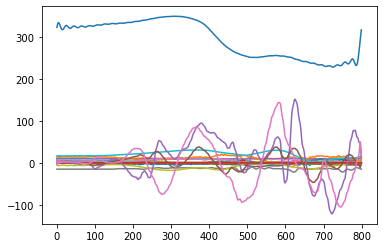

Bring


In [37]:
#all samples of n-th activity
n = 0
plt.plot(train_features[n])
plt.show()
print(labeldict[n])

In [38]:
#set input and output dimensions
num_time_periods, num_sensors = train_features.shape[1], train_features.shape[2]
num_classes = 55

#keras are not able to process multi-dimensional input data - data needs to be flatten - from 800x27 to 21600 values
input_shape = (num_time_periods * num_sensors)
train_features = train_features.reshape(train_features.shape[0], input_shape)

print('train_features shape:', train_features.shape)
print('train_input_shape:', input_shape)


test_num_time_periods, test_num_sensors = test_features.shape[1], test_features.shape[2]

test_input_shape = (test_num_time_periods * test_num_sensors)
test_features = test_features.reshape(test_features.shape[0], test_input_shape)
print('test_features shape:', test_features.shape)
print('test_input_shape:', test_input_shape)

train_features shape: (2284, 21600)
train_input_shape: 21600
test_features shape: (2288, 21600)
test_input_shape: 21600


In [39]:
#numeric values can be misinterpreted by algorithms as having some sort of hierarchy/order in them 
#--> problem can be solved with one-hot-encoding
y_train_hot = np_utils.to_categorical(train_label, num_classes)
print('New y_train shape: ', y_train_hot.shape)

New y_train shape:  (2284, 55)


In [40]:
y_test_hot = np_utils.to_categorical(test_label, num_classes)
print('New y_test shape: ', y_test_hot.shape)

New y_test shape:  (2288, 55)


In [41]:
#define evaluation metrices: F1-score 

def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [46]:
#create model
TIME_PERIODS = 800

model = Sequential()
model.add(Reshape((TIME_PERIODS, 27), input_shape=(input_shape,)))
model.add(Conv1D(filters=30, kernel_size=60, strides=1, activation='tanh'))
model.add(MaxPooling1D(pool_size=6, strides=1))
model.add(Conv1D(filters=30, kernel_size=60, strides=1, activation='tanh'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(55, activation='softmax'))

model.summary()

#stop training with best model if no improvement of val_loss after 10 iterations
callbacks_list = [
    keras.callbacks.ModelCheckpoint(filepath='best_model.{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', save_best_only=True),
keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
]

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_7 (Reshape)         (None, 800, 27)           0         
                                                                 
 conv1d_14 (Conv1D)          (None, 741, 30)           48630     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 736, 30)          0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, 677, 30)           54030     
                                                                 
 dense_14 (Dense)            (None, 677, 100)          3100      
                                                                 
 dropout_7 (Dropout)         (None, 677, 100)          0         
                                                      

In [47]:
# Compile the model with adam optimizer and learning rate 0.0001
# evaluation matries: accuracy, F1, Mean Average Precision Metric
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate = 0.0001), metrics=['accuracy', F1, tfr.keras.metrics.MeanAveragePrecisionMetric()])

# Train the model on the train set
X_train = train_features
Y_train = train_label

X_test = test_features
Y_test = test_label

BATCH_SIZE = 32
EPOCHS = 50

#training and evalutaion of the model
history = model.fit(X_train, y_train_hot, batch_size=BATCH_SIZE, validation_split=0.2, epochs=EPOCHS, verbose=1)
score = model.evaluate(X_test, y_test_hot, verbose=1)

Epoch 1/50
58/58 [==============================] - 28s 472ms/step - loss: 3.6641 - accuracy: 0.1095 - F1: 0.0124 - mean_average_precision_metric_7: 0.2190 - val_loss: 2.9664 - val_accuracy: 0.2407 - val_F1: 0.0629 - val_mean_average_precision_metric_7: 0.3786
Epoch 2/50
58/58 [==============================] - 27s 462ms/step - loss: 2.2948 - accuracy: 0.3870 - F1: 0.2321 - mean_average_precision_metric_7: 0.5291 - val_loss: 2.3576 - val_accuracy: 0.3851 - val_F1: 0.2732 - val_mean_average_precision_metric_7: 0.5225
Epoch 3/50
58/58 [==============================] - 29s 499ms/step - loss: 1.5934 - accuracy: 0.5824 - F1: 0.4591 - mean_average_precision_metric_7: 0.7012 - val_loss: 2.3437 - val_accuracy: 0.3873 - val_F1: 0.2596 - val_mean_average_precision_metric_7: 0.5267
Epoch 4/50
58/58 [==============================] - 29s 498ms/step - loss: 1.2440 - accuracy: 0.6650 - F1: 0.5998 - mean_average_precision_metric_7: 0.7683 - val_loss: 2.0712 - val_accuracy: 0.4354 - val_F1: 0.3762 - 

58/58 [==============================] - 22s 380ms/step - loss: 0.0370 - accuracy: 0.9934 - F1: 0.9932 - mean_average_precision_metric_7: 0.9963 - val_loss: 2.2709 - val_accuracy: 0.5602 - val_F1: 0.5644 - val_mean_average_precision_metric_7: 0.6735
Epoch 33/50
58/58 [==============================] - 22s 386ms/step - loss: 0.0334 - accuracy: 0.9940 - F1: 0.9932 - mean_average_precision_metric_7: 0.9967 - val_loss: 2.2607 - val_accuracy: 0.5427 - val_F1: 0.5737 - val_mean_average_precision_metric_7: 0.6656
Epoch 34/50
58/58 [==============================] - 23s 388ms/step - loss: 0.0512 - accuracy: 0.9885 - F1: 0.9894 - mean_average_precision_metric_7: 0.9934 - val_loss: 2.3716 - val_accuracy: 0.5164 - val_F1: 0.5381 - val_mean_average_precision_metric_7: 0.6435
Epoch 35/50
58/58 [==============================] - 22s 382ms/step - loss: 0.0450 - accuracy: 0.9907 - F1: 0.9916 - mean_average_precision_metric_7: 0.9950 - val_loss: 2.3729 - val_accuracy: 0.5514 - val_F1: 0.5629 - val_mean

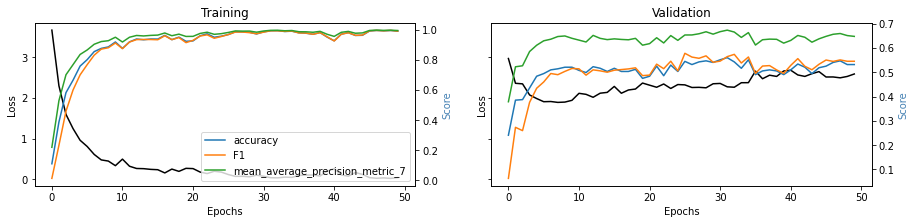

Score test data: [3.8872509002685547, 0.38024476170539856, 0.3929554224014282, 0.5187253952026367]


In [48]:
# plot the results
metrics = [k for k in history.history.keys() if ("loss" not in k) and ("val" not in k)]    
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
       
## training    
ax[0].set(title="Training")    
ax11 = ax[0].twinx()    
ax[0].plot(history.history['loss'], color='black')    
ax[0].set_xlabel('Epochs')    
ax[0].set_ylabel('Loss', color='black')    
for metric in metrics:        
    ax11.plot(history.history[metric], label=metric)    
    ax11.set_ylabel("Score", color='steelblue')    
ax11.legend()
        
## validation    
ax[1].set(title="Validation")    
ax22 = ax[1].twinx()    
ax[1].plot(history.history['val_loss'], color='black')    
ax[1].set_xlabel('Epochs')    
ax[1].set_ylabel('Loss', color='black')    
for metric in metrics:          
    ax22.plot(history.history['val_'+metric], label=metric)    
    ax22.set_ylabel("Score", color="steelblue")    
plt.show()

#test
print("Score test data:", score)